Example code to calculate the correlation between two 2D fields along the third dimension (usually time).

In [8]:
import xarray as xr
from dask.diagnostics import ProgressBar

In [4]:
basedir = ('/archive/Richard.Slater/xanadu_esm4_20190304_mom6_ESM4_v1.0.3_rc1/'
           +'ESM4_piControl_D/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_cobalt_omip_2d/ts/monthly/5yr/')
variable1 = 'intpp'
variable2 = 'limirrdiat'
variables = [variable1, variable2]
ds = xr.Dataset()
for variable in variables:
    filename = 'ocean_cobalt_omip_2d.*.'+variable+'.nc'
    ds[variable] = xr.open_mfdataset(basedir+filename)[variable]

### Full time-series

In [6]:
# Pearson correlation coefficient, using xr.corr
cr = xr.corr(ds[variable1],ds[variable2],dim='time')

In [9]:
with ProgressBar():
    cr = cr.load()

[###############################         ] | 78% Completed | 42.95 ss

/nbhome/gam/miniconda3/envs/climpred_clean/lib/python3.10/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 50.00 s


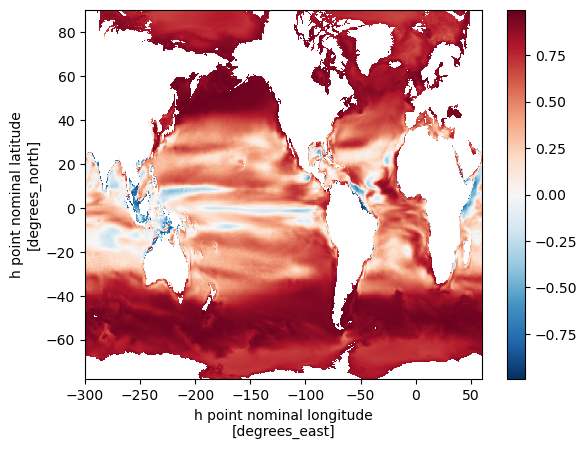

In [10]:
cr.plot()

### De-seasonalize first

In [21]:
gb = ds.groupby('time.month')
clim = gb.mean('time')
ds_anom = gb - clim

/nbhome/gam/miniconda3/envs/climpred_clean/lib/python3.10/site-packages/xarray/core/indexing.py:1372: PerformanceWarning: Slicing with an out-of-order index is generating 300 times more chunks
  return self.array[key]


In [22]:
ds_anom

<xarray.Dataset>
Dimensions:     (xh: 720, yh: 576, time: 3600)
Coordinates:
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time        (time) object 0101-01-16 12:00:00 ... 0400-12-16 12:00:00
    month       (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    intpp       (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    limirrdiat  (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>

In [23]:
# Pearson correlation coefficient, using xr.corr
cr = xr.corr(ds_anom[variable1],ds_anom[variable2],dim='time')

In [24]:
with ProgressBar():
    cr = cr.load()

[################################        ] | 80% Completed | 98.79 ss

/nbhome/gam/miniconda3/envs/climpred_clean/lib/python3.10/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 111.75 s


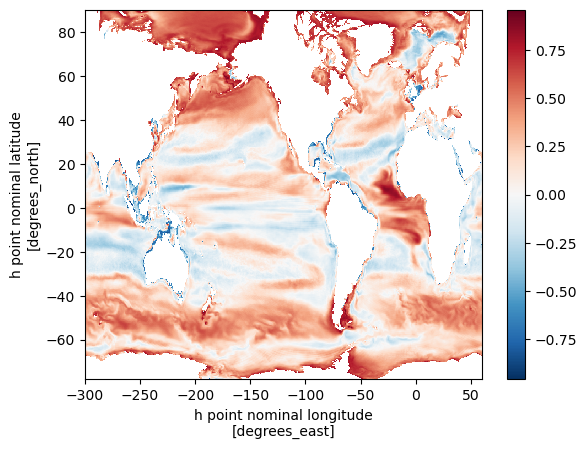

In [25]:
cr.plot()

### De-seasonalize and de-trend first

In [33]:
p = (ds_anom).polyfit(dim='time',deg=1)
fit = xr.polyval(ds.time,p).rename({variable1+'_polyfit_coefficients':variable1,
                                    variable2+'_polyfit_coefficients':variable2})
ds_anomdt = ds_anom-fit

In [34]:
ds_anomdt

<xarray.Dataset>
Dimensions:     (xh: 720, yh: 576, time: 3600)
Coordinates:
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time        (time) object 0101-01-16 12:00:00 ... 0400-12-16 12:00:00
    month       (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Data variables:
    intpp       (time, yh, xh) float64 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    limirrdiat  (time, yh, xh) float64 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>

In [35]:
# Pearson correlation coefficient, using xr.corr
cr = xr.corr(ds_anomdt[variable1],ds_anomdt[variable2],dim='time')

In [36]:
with ProgressBar():
    cr = cr.load()

[##################################      ] | 85% Completed | 361.88 s

/nbhome/gam/miniconda3/envs/climpred_clean/lib/python3.10/site-packages/dask/array/numpy_compat.py:42: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


[########################################] | 100% Completed | 377.43 s


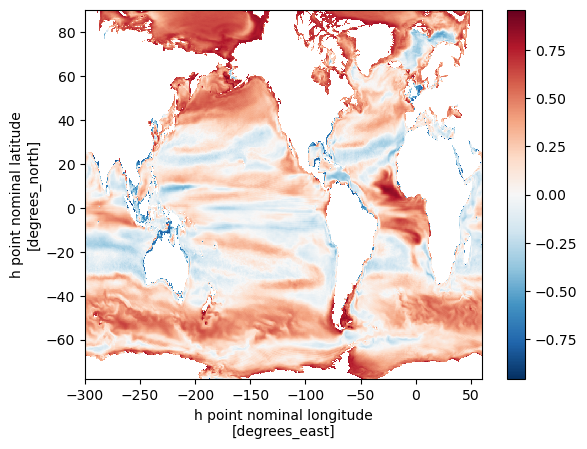

In [37]:
cr.plot()